In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import scipy.signal as signal

In [3]:
# This the max number of samples that can be stored in the RF Core RAM
AOA_RES_MAX_SIZE = 511
# Note this is a direct port of AOA.c::AOA_calcNumOfCteSamples
# this class makes all the samples the same size of 511!
def num_iqsamples_per_evt(cte_scan_ovs, cte_offset, cte_time):
    samp_per_evt = (((cte_time * 8) - cte_offset) * cte_scan_ovs)

    if samp_per_evt > AOA_RES_MAX_SIZE:
        samp_per_evt = AOA_RES_MAX_SIZE

    return samp_per_evt
# calculate the phase and the magnetude of the signal (sqrt(I^2 + Q^2)) and arct(Q/I)
def cal_magnitude(q_value,i_value):

    return math.sqrt(math.pow(q_value,2)+math.pow(i_value,2))

def cal_phase(q_value,i_value):

    return math.degrees(math.atan2(q_value,i_value))

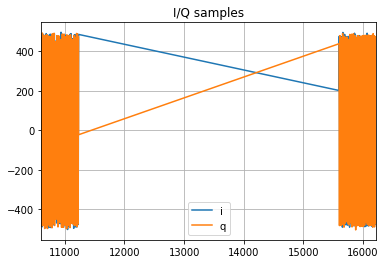

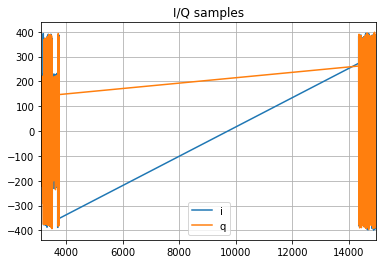

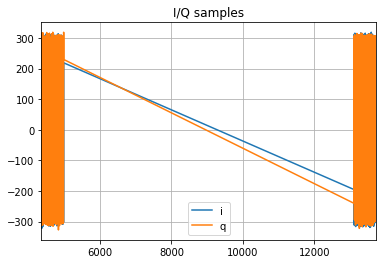

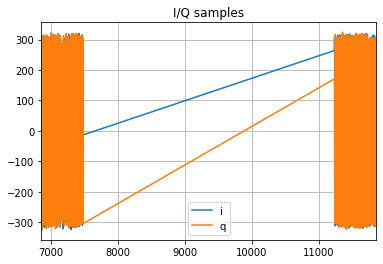

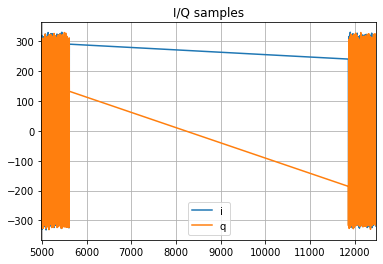

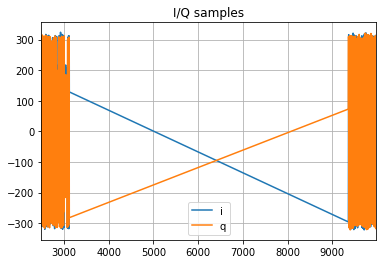

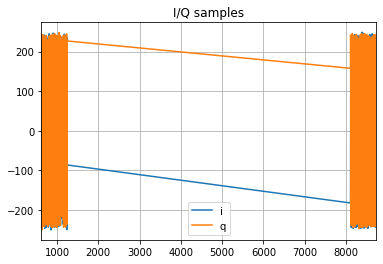

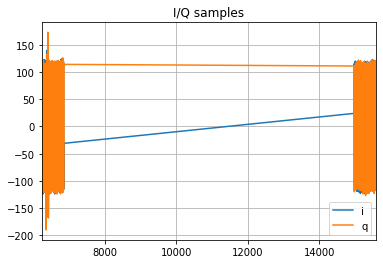

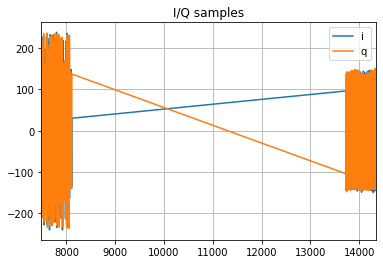

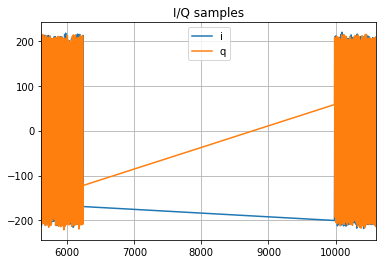

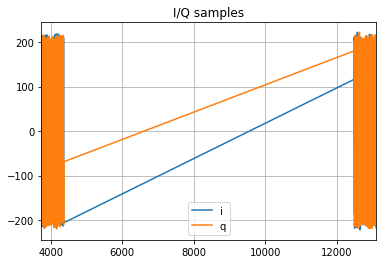

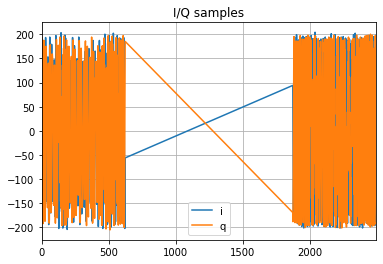

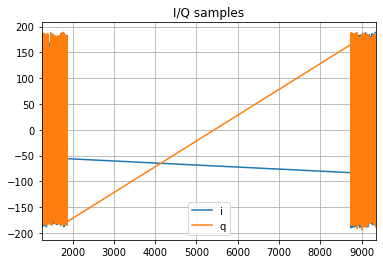

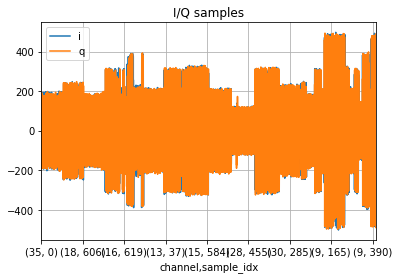

In [4]:
if __name__ == "__main__":
    
#     df = pd.read_csv('rtls_raw_iq_samples_f88a5e2d88c5_0.csv')
    path = 'C:/ti/simplelink_cc13x2_26x2_sdk_4_40_04_04/tools/ble5stack/rtls_agent/examples/rtls_aoa_iq_with_rtls_util_export_into_csv_3ant_log/0x11/04_09_2021_15_49_03_rtls_raw_iq_samples_Master_0x11_f88a5e2d8f14_0.csv'
#     path = 'C:/ti/simplelink_cc13x2_26x2_sdk_4_40_04_04/tools/ble5stack/rtls_agent/examples/rtls_aoa_iq_with_rtls_util_export_into_csv_3ant_log/0x11/04_09_2021_15_49_03_rtls_raw_iq_samples_Passive_0x11_f88a5e2d7808_0.csv'
#     path = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/81data_points/rtls_test_results/test_at_30or120_degree/04_06_2021_14_01_02_rtls_raw_iq_samples_f88a5e2d7808_0.csv'
    df = pd.read_csv(path)
    aoa_cte_scan_ovs = 4
    aoa_cte_offset = 4
    aoa_cte_time = 20
    aoa_iq_samples_per_ce = num_iqsamples_per_evt(aoa_cte_scan_ovs, aoa_cte_offset, aoa_cte_time)
    
    #remove dublicates
    df = df.drop_duplicates()

    df['phase'] = df.apply(lambda row: cal_phase(row['q'], row['i']), axis=1)
    df['magnitude'] = df.apply(lambda row: cal_magnitude(row['q'], row['i']), axis=1)

    # Plot all the I/Q collected. Each channel will have a plot which contains I/Q samples.
    # If you have collected I/Q data on 37 data channels, then there will be 37 windows popped up
    grouped = df.groupby('channel')
    axes = grouped[['i', 'q']].plot(title="I/Q samples", grid=True)

    # Create 4 plots and each plot has x number of subplots. x = number of channels
    indexed = df.set_index(['channel', 'sample_idx'])
    # drop the dublicates
    indexed_modified = indexed.drop_duplicates()
    indexed_modified = indexed_modified[~indexed_modified.index.duplicated(keep='first')]
    axes = indexed_modified[['i', 'q']].plot(title="I/Q samples", grid=True)

    plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A04E582D88>,
      dtype=object)

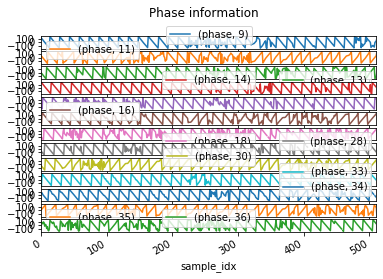

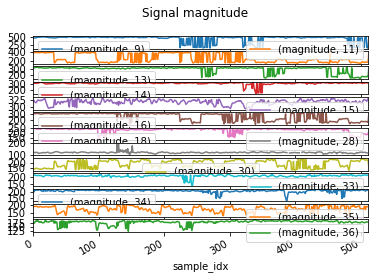

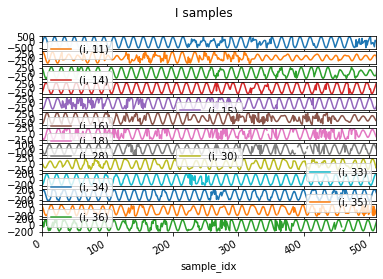

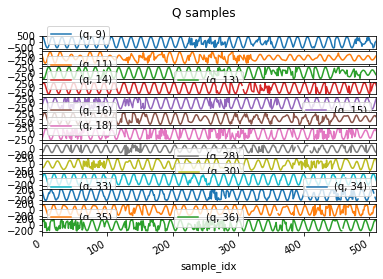

In [5]:
    indexed_modified.unstack(level=0)[['phase']].plot(subplots=True, title="Phase information", xlim=[0,aoa_iq_samples_per_ce], ylim=[-190,+190])
#     plt.savefig('Phase.png', dpi=300, bbox_inches='tight')
    indexed_modified.unstack(level=0)[['magnitude']].plot(subplots=True, title="Signal magnitude", xlim=[0,aoa_iq_samples_per_ce])
#     plt.savefig('Magnitude.png', dpi=300, bbox_inches='tight')
    indexed_modified.unstack(level=0)[['i']].plot(subplots=True, title="I samples", xlim=[0,aoa_iq_samples_per_ce])
#     plt.savefig('Isamples.png', dpi=300, bbox_inches='tight')
    indexed_modified.unstack(level=0)[['q']].plot(subplots=True, title="Q samples", xlim=[0,aoa_iq_samples_per_ce])
#     plt.savefig('Qsamples.png', dpi=300, bbox_inches='tight')

In [6]:
# teta = arcsin(landa*phase/2*&pi*d)
# where d is landa/2 teta is simply: arcsin(phase/pi)
indexed_modified['teta'] = np.degrees(np.arcsin(indexed_modified['phase']/180))

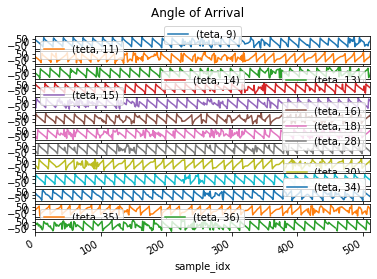

In [7]:
indexed_modified.unstack(level=0)[['teta']].plot(subplots=True, title="Angle of Arrival", xlim=[0,aoa_iq_samples_per_ce])
plt.savefig('teta.png', dpi=300, bbox_inches='tight')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0534AB6C8>,
      dtype=object)

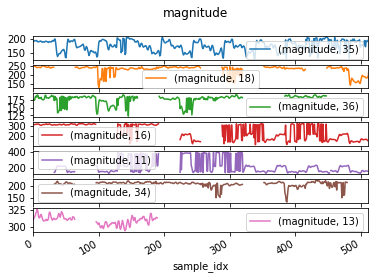

In [8]:
test = indexed_modified[0:624*5]
test.unstack(level=0)[['magnitude']].plot(subplots=True, title="magnitude", xlim=[0,aoa_iq_samples_per_ce])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A04E4BFA88>,
      dtype=object)

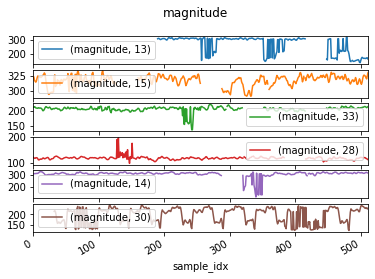

In [9]:
test = indexed_modified[624*5:624*10]
test.unstack(level=0)[['magnitude']].plot(subplots=True, title="magnitude", xlim=[0,aoa_iq_samples_per_ce])

In [10]:
indexed_modified.unstack(level=0)[['teta']]

teta                                                         \
channel            9          11         13         14         15         16   
sample_idx                                                                     
0           43.583941  14.090620  -2.955240  67.001441 -52.227215 -64.699502   
1           32.870183   6.608167 -11.248622  52.476821 -65.253573  75.482209   
2           24.258110  -1.524396 -18.841032  40.498153  73.297018  57.338230   
3           16.207763  -8.743990 -26.844013  31.434939  56.550876  44.619364   
4            7.602060 -17.088502 -36.638665  22.299691  43.650267  35.464601   
...               ...        ...        ...        ...        ...        ...   
619         30.757881 -35.635742  51.290718  -0.959045  39.780166   9.540980   
620         22.503504 -45.018827  39.273409  -8.486920  30.202694   1.516491   
621         14.644754 -58.025904  -7.205173 -15.342660  22.554310  -5.619661   
622          6.322095 -77.769194  23.075568 -22.407438  14.561243 -13.756196   
623         -0.825045  60.935965  14.939365 -30.904166   7.842962 -21.311345   

                                                                              \
channel            18         28         30         33         34         35   
sample_idx                                                                     
0          -35.265062 -23.323724 -15.231852 -73.635466  18.528745   5.121644   
1          -45.904766 -31.423981 -23.337703  67.821628  18.916893  12.265941   
2          -57.186890 -41.830148 -31.524332  52.783422   3.502403  20.726063   
3          -77.994194 -53.134614 -42.193528  42.561485  -4.389551  28.808102   
4           63.895810 -71.183616 -54.493556  32.336379 -12.253302  38.554540   
...               ...        ...        ...        ...        ...        ...   
619        -59.361634 -63.046895  73.418838 -15.549954 -20.885759 -60.078867   
620        -78.768391  77.197442 -30.294955 -22.979697 -29.899769  86.783065   
621         61.909696  58.745854  45.301715 -32.142617 -39.756548  59.685025   
622         49.388821  45.484686  34.998742 -41.191601 -49.601098  47.601422   
623         37.971875  35.768688  25.555185 -53.222898 -63.782086  36.410206   

                       
channel            36  
sample_idx             
0           33.809901  
1           24.484276  
2           15.397557  
3           36.107182  
4           27.209420  
...               ...  
619         -3.797268  
620        -11.597749  
621        -18.806593  
622        -27.427662  
623        -36.656897  

[624 rows x 13 columns]

In [11]:
indexed_modified['phase']
grouped_indexed_modified = indexed_modified.groupby('channel')
print('The Max phase in each channel is', grouped_indexed_modified[['phase']].max() 
       , '\n and The Max teta in each channel is' , grouped_indexed_modified[['teta']].max())

The Max phase in each channel is               phase
channel            
9        179.880135
11       180.000000
13       179.207943
14       180.000000
15       180.000000
16       180.000000
18       180.000000
28       179.037136
30       177.534241
33       178.099889
34       179.459490
35       179.716360
36       179.695238 
 and The Max teta in each channel is               teta
channel           
9        87.908911
11       90.000000
13       84.623013
14       90.000000
15       90.000000
16       90.000000
18       90.000000
28       84.071053
30       80.505465
33       81.667532
34       85.558680
35       86.783065
36       86.665406


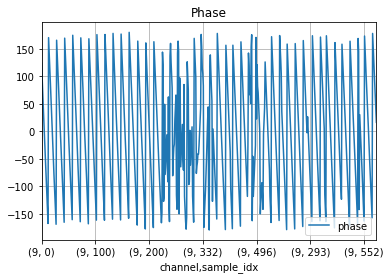

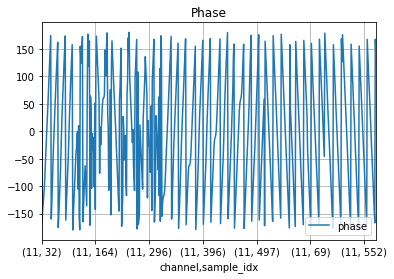

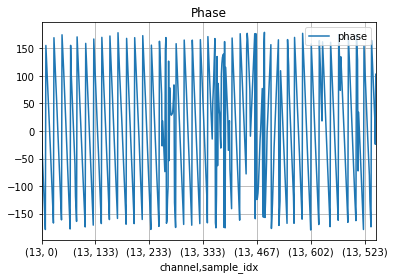

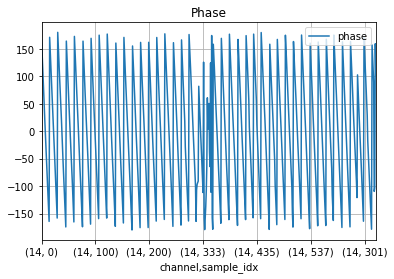

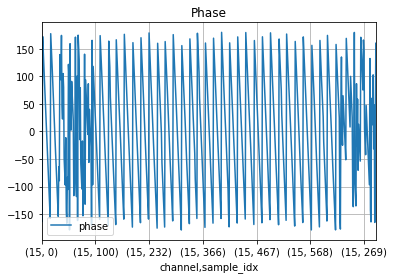

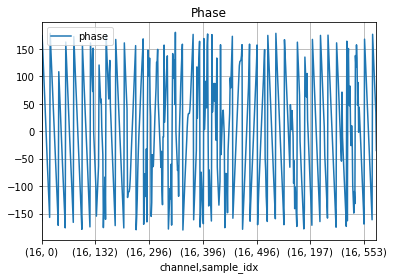

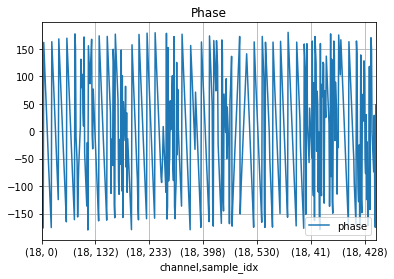

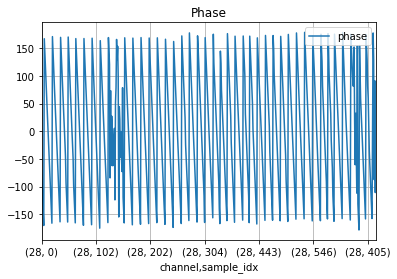

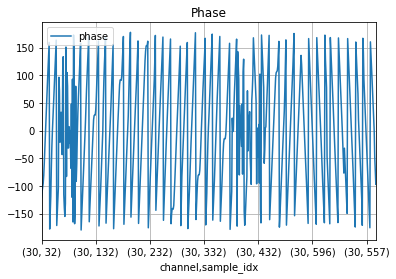

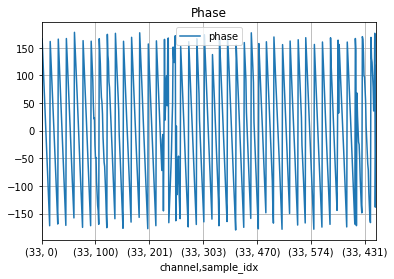

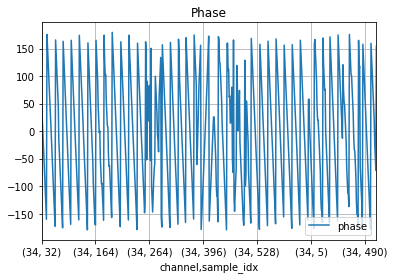

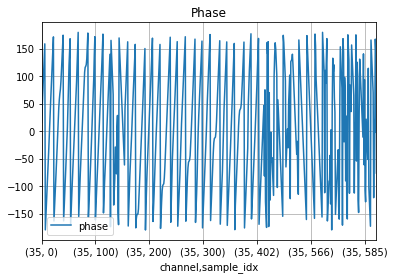

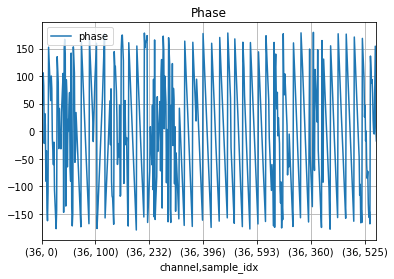

In [12]:
axes = grouped_indexed_modified[['phase']].plot(title="Phase", grid=True)

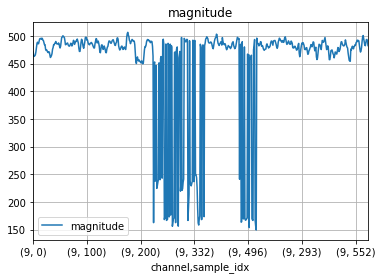

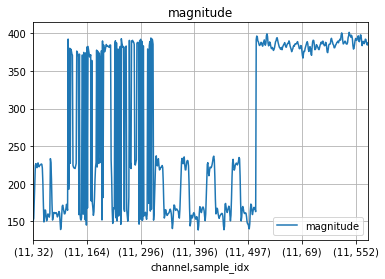

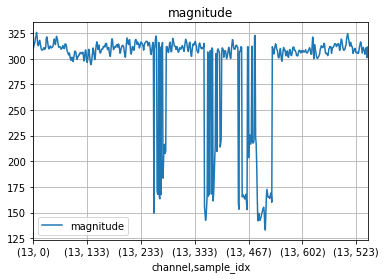

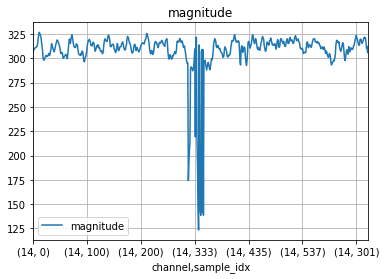

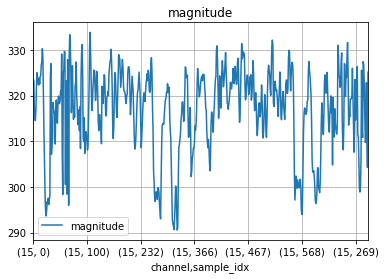

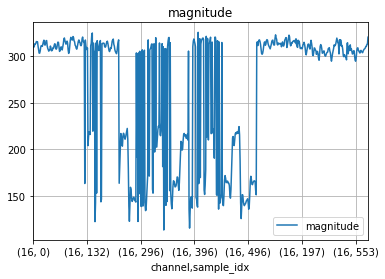

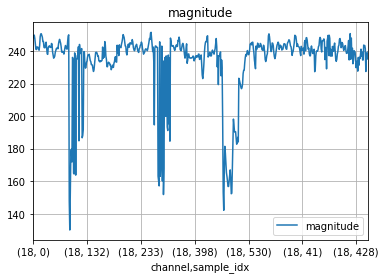

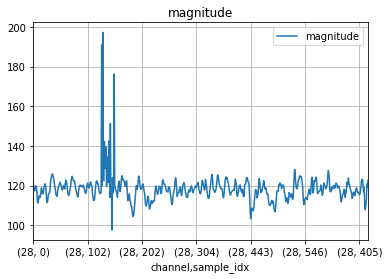

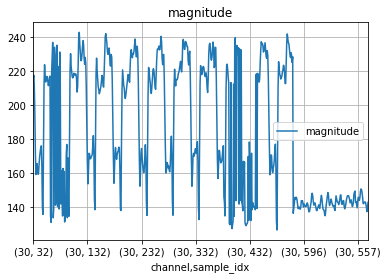

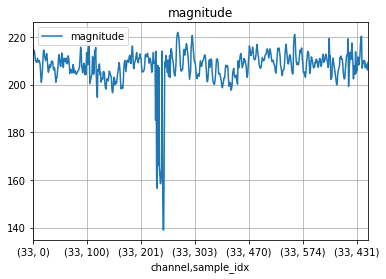

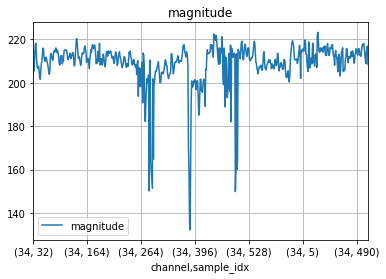

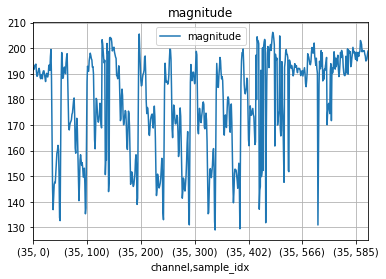

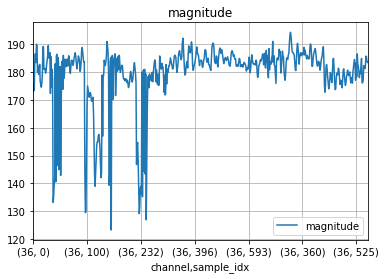

In [13]:
axes = grouped_indexed_modified[['magnitude']].plot(title="magnitude", grid=True)

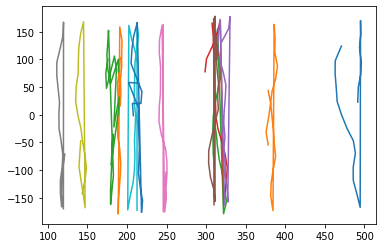

In [16]:
plt.plot(indexed_modified.unstack(level=0)['magnitude'][0:20], indexed_modified.unstack(level=0)['phase'][0:20])

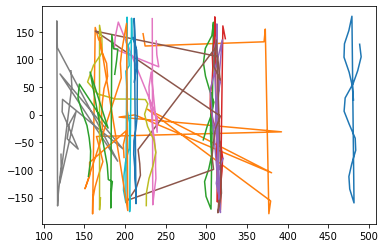

In [22]:
plt.plot(indexed_modified.unstack(level=0)['magnitude'][120:140], indexed_modified.unstack(level=0)['phase'][120:140])